# Asteroid Class Prediction Leveraging Parallelization Techniques 

<div style="text-align: right">  
<strong>Uday Kiran Dasari</strong> 
</div>
<br/>
<center>
<img src="Asteroid.jpg" width=700 />
</center>
<br/>

**Link to Dataset used**: [**Asteroid Dataset**](https://www.kaggle.com/datasets/sakhawat18/asteroid-dataset/data)

### Dataset Description

- **SPK-ID:** Object primary SPK-ID
- **Object ID:** Object internal database ID
- **Object fullname:** Object full name/designation
- **pdes:** Object primary designation
- **name:** Object IAU name
- **NEO:** Near-Earth Object (NEO) flag
- **PHA:** Potentially Hazardous Asteroid (PHA) flag
- **H:** Absolute magnitude parameter
- **Diameter:** Object diameter (from equivalent sphere) km Unit
- **Albedo:** Geometric albedo
- **Diameter_sigma:** 1-sigma uncertainty in object diameter km Unit
- **Orbit_id:** Orbit solution ID
- **Epoch:** Epoch of osculation in modified Julian day form
- **Equinox:** Equinox of reference frame
- **e:** Eccentricity
- **a:** Semi-major axis au Unit
- **q:** Perihelion distance au Unit
- **i:** Inclination; angle with respect to x-y ecliptic plane
- **tp:** Time of perihelion passage TDB Unit
- **moid_ld:** Earth Minimum Orbit Intersection Distance au Unit
-y ecliptic plane

### Import Necessary Libraries

In [1]:
# DataFrame Manipulation Libraries
import numpy as np
import pandas as pd

# Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preprocessing Libraries
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Machine Learning Models
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# XGBoost
import xgboost as xgb

# Metrics Libraries
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

## Data Preprocessing

### Loading the dataset

In [2]:
%%time
# Reading the dataset into memory
astro_ds = pd.read_csv("dataset.csv",low_memory=False) 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

CPU times: user 11.3 s, sys: 2.04 s, total: 13.3 s
Wall time: 13.3 s


In [3]:
astro_ds.head()

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,albedo,diameter_sigma,orbit_id,epoch,epoch_mjd,epoch_cal,equinox,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,0.0900,0.200,JPL 47,2458600.5,58600,20190427.0,J2000,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,77.372098,2.979647,0.213885,2.458239e+06,2.018043e+07,1683.145703,4.608202,1.59478,620.640533,4.819000e-12,1.032800e-11,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,0.1010,18.000,JPL 37,2459000.5,59000,20200531.0,J2000,0.229972,2.773841,2.135935,34.832932,173.024741,310.202392,144.975675,3.411748,0.213345,2.458321e+06,2.018072e+07,1687.410992,4.619880,1.23429,480.348639,3.193400e-08,4.033700e-09,8.832200e-08,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,0.2140,10.594,JPL 112,2459000.5,59000,20200531.0,J2000,0.256936,2.668285,1.982706,12.991043,169.851482,248.066193,125.435355,3.353865,0.226129,2.458446e+06,2.018112e+07,1592.013769,4.358696,1.03429,402.514639,3.052000e-08,3.471800e-09,8.139200e-08,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,0.4228,0.200,JPL 35,2458600.5,58600,20190427.0,J2000,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,95.861938,2.570926,0.271609,2.458248e+06,2.018051e+07,1325.432763,3.628837,1.13948,443.451432,2.332100e-10,1.514300e-09,1.928600e-09,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,0.2740,3.140,JPL 114,2459000.5,59000,20200531.0,J2000,0.190913,2.574037,2.082619,5.367427,141.571026,358.648418,17.846343,3.065455,0.238661,2.458926e+06,2.020032e+07,1508.414421,4.129814,1.09575,426.433027,2.373700e-08,3.970900e-09,6.092400e-08,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


In [4]:
astro_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              958524 non-null  object 
 1   spkid           958524 non-null  int64  
 2   full_name       958524 non-null  object 
 3   pdes            958524 non-null  object 
 4   name            22064 non-null   object 
 5   prefix          18 non-null      object 
 6   neo             958520 non-null  object 
 7   pha             938603 non-null  object 
 8   H               952261 non-null  float64
 9   diameter        136209 non-null  float64
 10  albedo          135103 non-null  float64
 11  diameter_sigma  136081 non-null  float64
 12  orbit_id        958524 non-null  object 
 13  epoch           958524 non-null  float64
 14  epoch_mjd       958524 non-null  int64  
 15  epoch_cal       958524 non-null  float64
 16  equinox         958524 non-null  object 
 17  e         

In [5]:
# Number of rows and columns
astro_ds.shape

(958524, 45)

In [6]:
# Describing the central tendencies and other measures of dispersion of the data
astro_ds.describe()

,spkid,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
count,9.585240e+05,952261.000000,136209.000000,135103.000000,136081.000000,9.585240e+05,958524.000000,9.585240e+05,958524.000000,958524.000000,958524.000000,958524.000000,958524.000000,958524.000000,958523.000000,958520.000000,9.585240e+05,9.585240e+05,9.585240e+05,9.585200e+05,9.585230e+05,9.386030e+05,958397.000000,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.385980e+05,9.386020e+05,9.386020e+05,9.385980e+05,958522.000000
mean,3.810114e+06,16.906411,5.506429,0.130627,0.479184,2.458869e+06,58868.781950,2.019693e+07,0.156116,2.902143,2.394887,9.054901,168.456416,181.369457,177.352582,3.455820,2.366846e-01,2.458856e+06,2.019581e+07,5.085344e+03,1.392287e+01,1.415162e+00,539.364207,7.262721e-01,1.541424e+01,1.982929e+01,1.168449e+00,5.310234e+00,1.370062e+06,1.369977e+06,2.131453e+01,5.060221e-02,4.312780e+08,8.525815e+04,0.561153
std,6.831541e+06,1.790405,9.425164,0.110323,0.782895,7.016716e+02,701.671573,1.930354e+04,0.092643,39.719503,2.139246,6.637656,102.881707,103.887995,105.816844,71.769401,7.941705e-02,1.580506e+03,4.337669e+04,2.308961e+06,6.321581e+03,2.156731e+00,834.306975,9.336391e+01,4.392381e+03,2.903785e+03,1.282231e+02,1.333381e+03,9.158996e+08,9.158991e+08,7.197034e+03,9.814953e+00,2.953046e+11,2.767681e+07,2.745700
min,2.000001e+06,-1.100000,0.002500,0.001000,0.000500,2.425052e+06,25051.000000,1.927062e+07,0.000000,-14702.447872,0.070511,0.007744,0.000025,0.000130,-70.703676,0.653773,1.608247e-07,2.283183e+06,1.539011e+07,1.511918e+02,0.000000e+00,4.544120e-07,0.000000,4.819000e-12,1.032800e-11,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,0.000000
25%,2.239632e+06,16.100000,2.780000,0.053000,0.180000,2.459000e+06,59000.000000,2.020053e+07,0.092193,2.387835,1.971401,4.165419,80.604399,91.482063,83.785012,2.781603,1.894969e-01,2.458560e+06,2.019032e+07,1.347738e+03,3.689903e+00,9.797020e-01,375.394939,5.474900e-08,2.046500e-08,1.462000e-07,6.095900e-06,3.619400e-05,5.755000e-05,2.573700e-05,2.340900e-08,2.768800e-09,1.110900e-04,1.794500e-05,0.518040
50%,2.479262e+06,16.900000,3.972000,0.079000,0.332000,2.459000e+06,59000.000000,2.020053e+07,0.145002,2.646969,2.225816,7.415665,159.826919,182.358081,175.641078,3.046995,2.288655e-01,2.458945e+06,2.020041e+07,1.572976e+03,4.306571e+00,1.240850e+00,477.706175,8.171600e-08,3.849150e-08,2.271900e-07,8.688800e-06,6.642550e-05,1.047100e-04,4.900100e-05,4.359000e-08,4.638000e-09,2.230800e-04,3.501700e-05,0.566280
75%,3.752518e+06,17.714000,5.765000,0.190000,0.620000,2.459000e+06,59000.000000,2.020053e+07,0.200650,3.001932,2.578315,12.407550,252.247751,271.521589,269.865749,3.364793,2.671142e-01,2.459361e+06,2.021053e+07,1.899765e+03,5.201272e+00,1.593370e+00,617.324804,2.336475e-07,1.044675e-07,6.583200e-07,1.591500e-05,1.609775e-04,3.114400e-04,1.718900e-04,1.196600e-07,1.124000e-08,8.139600e-04,9.775475e-05,0.613927
max,5.401723e+07,33.200000,939.400000,1.000000,140.000000,2.459000e+06,59000.000000,2.020053e+07,1.855356,33488.895955,80.398819,175.082901,359.999793,359.999646,491.618014,66972.796064,2.381082e+00,2.546362e+06,2.259081e+07,2.238462e+09,6.128574e+06,7.947660e+01,30929.908422,3.942500e+04,3.241200e+06,1.015000e+06,5.533000e+04,1.199100e+06,8.845100e+11,8.845100e+11,5.509700e+06,7.698800e+03,2.853100e+14,1.910700e+10,2686.600000


In [7]:
# Checking the list of unique values of every feature
astro_ds['class'].nunique()#Counting NaN as Unique value

13

In [8]:
# Finding the number of null values in each feature
astro_ds.isnull().sum()

id                     0
spkid                  0
full_name              0
pdes                   0
name              936460
prefix            958506
neo                    4
pha                19921
H                   6263
diameter          822315
albedo            823421
diameter_sigma    822443
orbit_id               0
epoch                  0
epoch_mjd              0
epoch_cal              0
equinox                0
e                      0
a                      0
q                      0
i                      0
om                     0
w                      0
ma                     1
ad                     4
n                      0
tp                     0
tp_cal                 0
per                    4
per_y                  1
moid               19921
moid_ld              127
sigma_e            19922
sigma_a            19922
sigma_q            19922
sigma_i            19922
sigma_om           19922
sigma_w            19922
sigma_ma           19922
sigma_ad           19926


#### Dropping Columns

Removing less informative features: `id`, `full_name`, `pdes`, `name `, `prefix`, `neo`, `pha`, `orbit_id`, `equinox`.

In [9]:
# Dropping columns such as names and IDs which are irrelevant for predicting orbit class
astro_ds.drop(columns=['id', 'full_name', 'pdes', 'name', 'prefix', 'neo', 'pha','orbit_id', 'equinox'],axis= 1, inplace=True)
astro_ds.head()

,spkid,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,2000001,3.40,939.400,0.0900,0.200,2458600.5,58600,20190427.0,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,77.372098,2.979647,0.213885,2.458239e+06,2.018043e+07,1683.145703,4.608202,1.59478,620.640533,4.819000e-12,1.032800e-11,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,2000002,4.20,545.000,0.1010,18.000,2459000.5,59000,20200531.0,0.229972,2.773841,2.135935,34.832932,173.024741,310.202392,144.975675,3.411748,0.213345,2.458321e+06,2.018072e+07,1687.410992,4.619880,1.23429,480.348639,3.193400e-08,4.033700e-09,8.832200e-08,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,2000003,5.33,246.596,0.2140,10.594,2459000.5,59000,20200531.0,0.256936,2.668285,1.982706,12.991043,169.851482,248.066193,125.435355,3.353865,0.226129,2.458446e+06,2.018112e+07,1592.013769,4.358696,1.03429,402.514639,3.052000e-08,3.471800e-09,8.139200e-08,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,2000004,3.00,525.400,0.4228,0.200,2458600.5,58600,20190427.0,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,95.861938,2.570926,0.271609,2.458248e+06,2.018051e+07,1325.432763,3.628837,1.13948,443.451432,2.332100e-10,1.514300e-09,1.928600e-09,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,2000005,6.90,106.699,0.2740,3.140,2459000.5,59000,20200531.0,0.190913,2.574037,2.082619,5.367427,141.571026,358.648418,17.846343,3.065455,0.238661,2.458926e+06,2.020032e+07,1508.414421,4.129814,1.09575,426.433027,2.373700e-08,3.970900e-09,6.092400e-08,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


In [10]:
# Finding the number of null values in each feature
astro_ds.isnull().sum()

spkid                  0
H                   6263
diameter          822315
albedo            823421
diameter_sigma    822443
epoch                  0
epoch_mjd              0
epoch_cal              0
e                      0
a                      0
q                      0
i                      0
om                     0
w                      0
ma                     1
ad                     4
n                      0
tp                     0
tp_cal                 0
per                    4
per_y                  1
moid               19921
moid_ld              127
sigma_e            19922
sigma_a            19922
sigma_q            19922
sigma_i            19922
sigma_om           19922
sigma_w            19922
sigma_ma           19922
sigma_ad           19926
sigma_n            19922
sigma_tp           19922
sigma_per          19926
class                  0
rms                    2
dtype: int64

In [11]:
#Identify Columns with Missing Values
missing_cols = astro_ds.columns[astro_ds.isnull().any()].tolist()
missing_cols

['H',
 'diameter',
 'albedo',
 'diameter_sigma',
 'ma',
 'ad',
 'per',
 'per_y',
 'moid',
 'moid_ld',
 'sigma_e',
 'sigma_a',
 'sigma_q',
 'sigma_i',
 'sigma_om',
 'sigma_w',
 'sigma_ma',
 'sigma_ad',
 'sigma_n',
 'sigma_tp',
 'sigma_per',
 'rms']

**Filling the null values using Simple Imputer**

In [12]:
from sklearn.impute import SimpleImputer

# Create an imputer object with a median filling strategy
median_imputer = SimpleImputer(strategy='median')

# Apply the imputer to the selected columns
astro_ds[missing_cols] = median_imputer.fit_transform(astro_ds[missing_cols])

In [13]:
# Verify that all missing values have been filled
astro_ds.isnull().sum()

spkid             0
H                 0
diameter          0
albedo            0
diameter_sigma    0
epoch             0
epoch_mjd         0
epoch_cal         0
e                 0
a                 0
q                 0
i                 0
om                0
w                 0
ma                0
ad                0
n                 0
tp                0
tp_cal            0
per               0
per_y             0
moid              0
moid_ld           0
sigma_e           0
sigma_a           0
sigma_q           0
sigma_i           0
sigma_om          0
sigma_w           0
sigma_ma          0
sigma_ad          0
sigma_n           0
sigma_tp          0
sigma_per         0
class             0
rms               0
dtype: int64

### Feature Importance


### ExtraTreesClassifier

The `ExtraTreesClassifier` is an ensemble learning method available in the `sklearn.ensemble` module. It constructs a multitude of decision trees and combines them to achieve a more accurate and stable prediction. 

This classifier is an extension of the Random Forest algorithm. It builds multiple decision trees and splits nodes using randomly selected subsets of features. It averages the predictions of the individual trees to improve the overall accuracy and control over-fitting.

The key parameters of the `ExtraTreesClassifier` include:
- The number of trees (`n_estimators`)
- The criterion used to evaluate splits (`criterion`)
- The maximum depth of the trees (`max_depth`)
- The minimum number of samples required to split an internal node (`min_samples_split`)
- `random_state`: Controls the random number generation for reproducibility
- `n_jobs`: Specifies the number of parallel jobs to run or training


In [14]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import seaborn as sns

#Prepare the data
X = astro_ds.drop('class', axis=1)  # Features
y = astro_ds['class']               # Target

In [15]:
%%time 
# Initialize and Train the ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=100)
model.fit(X, y)

CPU times: user 1min 50s, sys: 845 ms, total: 1min 51s
Wall time: 1min 51s


ExtraTreesClassifier()

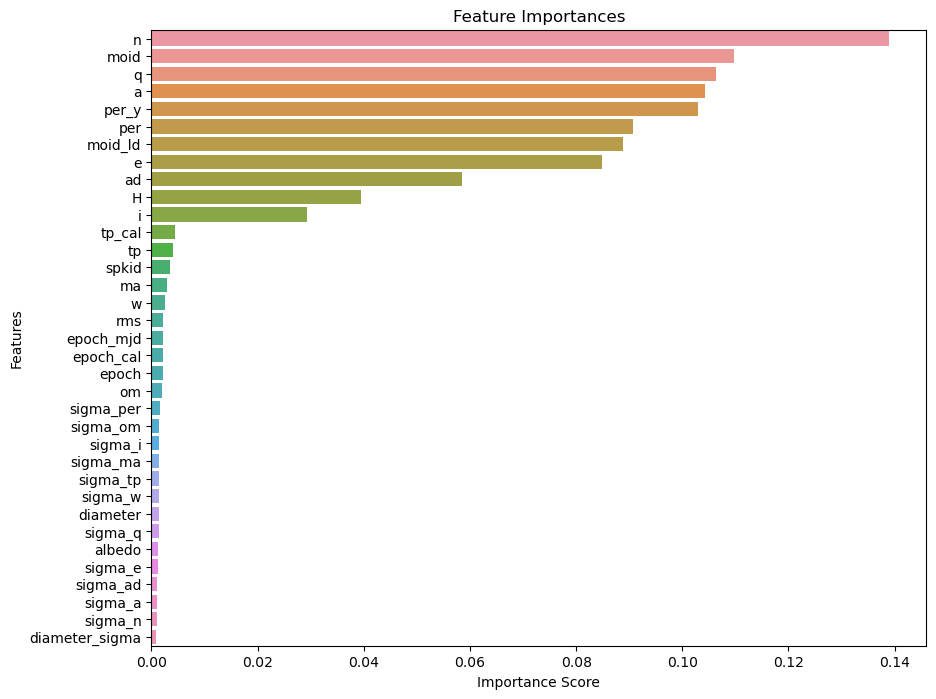

In [16]:
#Extract and visualize feature importances
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances = feat_importances.sort_values(ascending=False)

# Visualizing the feature importances
plt.figure(figsize=(10,8))
sns.barplot(x=feat_importances, y=feat_importances.index)
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [17]:
#Remove unnecessary columns based on the mean importance threshold
mean_importance = feat_importances.mean()
low_importance_features = feat_importances[feat_importances < mean_importance].index

In [18]:
feat_importances

n                 0.139024
moid              0.109669
q                 0.106333
a                 0.104321
per_y             0.102865
per               0.090660
moid_ld           0.088797
e                 0.084792
ad                0.058445
H                 0.039463
i                 0.029284
tp_cal            0.004402
tp                0.004146
spkid             0.003472
ma                0.002933
w                 0.002490
rms               0.002230
epoch_mjd         0.002203
epoch_cal         0.002153
epoch             0.002134
om                0.002081
sigma_per         0.001626
sigma_om          0.001481
sigma_i           0.001459
sigma_ma          0.001426
sigma_tp          0.001420
sigma_w           0.001418
diameter          0.001410
sigma_q           0.001386
albedo            0.001307
sigma_e           0.001179
sigma_ad          0.001114
sigma_a           0.001100
sigma_n           0.000986
diameter_sigma    0.000788
dtype: float64

In [19]:
low_importance_features

Index(['tp_cal', 'tp', 'spkid', 'ma', 'w', 'rms', 'epoch_mjd', 'epoch_cal',
       'epoch', 'om', 'sigma_per', 'sigma_om', 'sigma_i', 'sigma_ma',
       'sigma_tp', 'sigma_w', 'diameter', 'sigma_q', 'albedo', 'sigma_e',
       'sigma_ad', 'sigma_a', 'sigma_n', 'diameter_sigma'],
      dtype='object')

In [20]:
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
import pandas as pd
#Pearson correlation coefficients for each feature in X relative to a label-encoded target variable y.
def calculate_pearson_correlation(X, y):
    # Encode the categorical target variable if it's not numeric
    if y.dtype == 'object':
        encoder = LabelEncoder()
        y_encoded = encoder.fit_transform(y)
    else:
        y_encoded = y  # Use as is if already numeric

    # Create a DataFrame to store correlations
    correlations = pd.DataFrame(index=X.columns, columns=["Pearson_Correlation"])

    # Compute Pearson correlation for each feature
    for column in X.columns:
        # Ensure no null values; fill with median or a designated value if needed
        clean_column = X[column].fillna(X[column].median())
        correlations.loc[column, 'Pearson_Correlation'] = pearsonr(clean_column, y_encoded)[0]

    # Convert correlation values to float and sort by absolute value
    correlations['Pearson_Correlation'] = correlations['Pearson_Correlation'].astype(float)
#    correlations.sort_values(by='Pearson_Correlation', key=abs, ascending=True, inplace=True)
    correlations.sort_values(by='Pearson_Correlation', ascending=True, inplace=True)

    return correlations

In [21]:
# Calculate Pearson correlations
correlations = calculate_pearson_correlation(X, y)
print(correlations)

                Pearson_Correlation
n                         -0.583430
H                         -0.579526
e                         -0.414439
i                         -0.057957
spkid                     -0.019216
om                        -0.007556
albedo                    -0.007196
rms                       -0.002892
w                         -0.000266
sigma_n                    0.001402
sigma_om                   0.004068
sigma_tp                   0.004721
sigma_ma                   0.004835
sigma_w                    0.004835
per                        0.004943
per_y                      0.004943
sigma_ad                   0.009373
sigma_per                  0.009910
sigma_a                    0.011061
ad                         0.017984
sigma_i                    0.018694
sigma_e                    0.018972
ma                         0.019395
sigma_q                    0.021534
a                          0.025806
tp                         0.027662
tp_cal                     0

In [22]:
astro_ds.drop(columns=low_importance_features, inplace=True)

In [23]:
astro_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   H        958524 non-null  float64
 1   e        958524 non-null  float64
 2   a        958524 non-null  float64
 3   q        958524 non-null  float64
 4   i        958524 non-null  float64
 5   ad       958524 non-null  float64
 6   n        958524 non-null  float64
 7   per      958524 non-null  float64
 8   per_y    958524 non-null  float64
 9   moid     958524 non-null  float64
 10  moid_ld  958524 non-null  float64
 11  class    958524 non-null  object 
dtypes: float64(11), object(1)
memory usage: 87.8+ MB


In [24]:
# Verify that all missing values have been filled
astro_ds.isnull().sum()

H          0
e          0
a          0
q          0
i          0
ad         0
n          0
per        0
per_y      0
moid       0
moid_ld    0
class      0
dtype: int64

In [25]:
from sklearn.model_selection import train_test_split
X = astro_ds.drop('class', axis=1)  # All columns except the target
y = astro_ds['class']  # Target column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [26]:
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (766819, 11)
Testing set size: (191705, 11)


# Random Forest

In [27]:
import time

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

In [28]:
# Set up hyperparameter grid for tuning
# param_grid = {
#     'n_estimators': [100, 200, 300],  # number of trees in the forest
#     'max_depth': [10, 20, 30],  # maximum depth of each tree
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]}
param_grid_rf = {
    'n_estimators': [50],# number of trees in the forest
    'max_depth': [10, 20],  # maximum depth of each tree
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]}
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=3, scoring='accuracy', verbose=2)

# Measure the time taken to perform hyperparameter tuning
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

# Time taken
time_taken = end_time - start_time
print(f"Time taken for hyperparameter tuning: {time_taken:.2f} seconds")

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  58.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  53.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=  56.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=  59.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=  55.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=  56.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=  56.7s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=  59.8s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=  46.1s
[CV] END max_depth=10, min_samples_leaf=

In [29]:
# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy achieved: ", grid_search.best_score_)

Best parameters found:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best accuracy achieved:  0.9999660936901561


In [30]:
# Evaluate the best model on the test data
best_rf = grid_search.best_estimator_
predictions = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy on Test Set: ", accuracy)
print("Classification Report:\n", classification_report(y_test, predictions,zero_division = 0))

Accuracy on Test Set:  0.999979134607861
Classification Report:
               precision    recall  f1-score   support

         AMO       1.00      1.00      1.00      1745
         APO       1.00      1.00      1.00      2540
         AST       0.91      1.00      0.95        10
         ATE       1.00      1.00      1.00       333
         CEN       1.00      1.00      1.00       108
         HYA       1.00      1.00      1.00         1
         IEO       1.00      1.00      1.00         4
         IMB       1.00      1.00      1.00      4035
         MBA       1.00      1.00      1.00    171100
         MCA       1.00      1.00      1.00      3795
         OMB       1.00      1.00      1.00      5731
         TJN       1.00      1.00      1.00      1619
         TNO       1.00      1.00      1.00       684

    accuracy                           1.00    191705
   macro avg       0.99      1.00      1.00    191705
weighted avg       1.00      1.00      1.00    191705



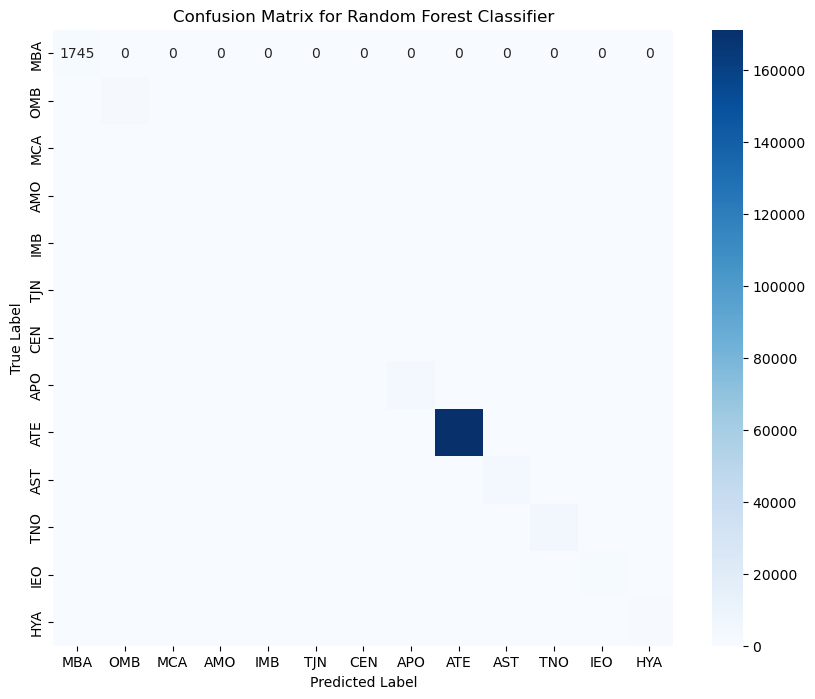

In [31]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=astro_ds['class'].unique().tolist(),
            yticklabels=astro_ds['class'].unique().tolist())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

# KNN

In [32]:
# Scaling the data - very important for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
# Initialize KNN
knn = KNeighborsClassifier()

In [34]:
# Setup hyperparameter grid
param_grid_knn = {
    'n_neighbors': [3, 5],
    'weights': ['uniform', 'distance'],
    'p': [1]  # 1=Manhattan Distance, 2=Euclidean Distance
}

# # Setup hyperparameter grid
# param_grid_knn = {
#     'n_neighbors': [3, 5, 7, 10],
#     'weights': ['uniform', 'distance'],
#     'p': [1, 2]  # 1=Manhattan Distance, 2=Euclidean Distance
# }

In [35]:
# Initialize GridSearchCV
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=3, scoring='accuracy', verbose=2)

# Measure the time taken to perform hyperparameter tuning
start_time = time.time()
grid_search_knn.fit(X_train_scaled, y_train)
end_time = time.time()

# Time taken
time_taken_knn = end_time - start_time
print(f"Time taken for hyperparameter tuning of KNN: {time_taken_knn:.2f} seconds")

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=  26.7s
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=  28.4s
[CV] END ................n_neighbors=3, p=1, weights=uniform; total time=  27.3s
[CV] END ...............n_neighbors=3, p=1, weights=distance; total time=  12.5s
[CV] END ...............n_neighbors=3, p=1, weights=distance; total time=  13.9s
[CV] END ...............n_neighbors=3, p=1, weights=distance; total time=  13.0s
[CV] END ................n_neighbors=5, p=1, weights=uniform; total time=  29.0s
[CV] END ................n_neighbors=5, p=1, weights=uniform; total time=  30.5s
[CV] END ................n_neighbors=5, p=1, weights=uniform; total time=  29.4s
[CV] END ...............n_neighbors=5, p=1, weights=distance; total time=  14.7s
[CV] END ...............n_neighbors=5, p=1, weights=distance; total time=  16.2s
[CV] END ...............n_neighbors=5, p=1, weigh

In [36]:
# Best parameters and best score
print("Best parameters found for KNN: ", grid_search_knn.best_params_)
print("Best accuracy achieved by KNN: ", grid_search_knn.best_score_)

Best parameters found for KNN:  {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Best accuracy achieved by KNN:  0.9855415683486554


In [37]:
# Evaluate the best model on the test data
best_knn = grid_search_knn.best_estimator_
predictions_knn = best_knn.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, predictions_knn)
print("Accuracy on Test Set by KNN: ", accuracy_knn)
print("KNN Classification Report:\n", classification_report(y_test, predictions_knn,zero_division = 0))

Accuracy on Test Set by KNN:  0.9861662450118672
KNN Classification Report:
               precision    recall  f1-score   support

         AMO       0.90      0.92      0.91      1745
         APO       0.96      0.95      0.96      2540
         AST       0.50      0.50      0.50        10
         ATE       0.98      0.98      0.98       333
         CEN       0.93      0.91      0.92       108
         HYA       0.00      0.00      0.00         1
         IEO       1.00      0.50      0.67         4
         IMB       0.97      0.99      0.98      4035
         MBA       0.99      1.00      0.99    171100
         MCA       0.94      0.92      0.93      3795
         OMB       0.93      0.74      0.82      5731
         TJN       1.00      1.00      1.00      1619
         TNO       1.00      0.99      1.00       684

    accuracy                           0.99    191705
   macro avg       0.85      0.80      0.82    191705
weighted avg       0.99      0.99      0.99    191705



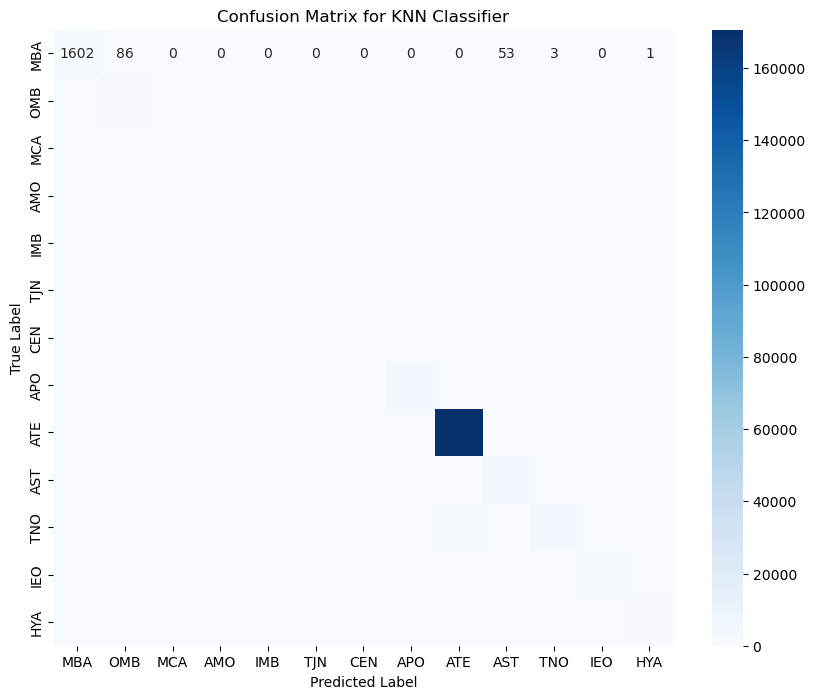

In [38]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions_knn)
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=astro_ds['class'].unique().tolist(),
            yticklabels=astro_ds['class'].unique().tolist())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

# XG Boost

In [39]:
# Data preprocessing
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

In [40]:
# Initialize the XGBoost classifier
xgb_clf = xgb.XGBClassifier(objective='multi:softmax', eval_metric='mlogloss')

In [41]:
# Setup hyperparameter grid
param_grid_xgb = {
    'max_depth': [3, 5, 7],  # Depth of each tree
    'n_estimators': [100],  # Number of trees
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage used to prevent overfitting
#    'subsample': [0.8, 1],  # Subsample ratio of the training instances
#    'colsample_bytree': [0.8, 1]  # Subsample ratio of columns when constructing each tree
}
params = {
    'objective': 'multi:softprob',
    'num_class': 13,
    'max_depth': 6,
    'learning_rate': 0.1,
    'tree_method': 'hist',
 }

# param_grid_xgb = {
#     'max_depth': [3, 5, 7],  # Depth of each tree
#     'n_estimators': [100, 200, 300],  # Number of trees
#     'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage used to prevent overfitting
#     'subsample': [0.8, 1],  # Subsample ratio of the training instances
#     'colsample_bytree': [0.8, 1]  # Subsample ratio of columns when constructing each tree
# }

In [42]:
# Initialize GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_clf, param_grid=param_grid_xgb, cv=3, scoring='accuracy', verbose=2)

# Measure the time taken to perform hyperparameter tuning
start_time = time.time()
grid_search_xgb.fit(X_train, y_train_encoded)
end_time = time.time()

# Time taken
time_taken_xgb = end_time - start_time
print(f"Time taken for hyperparameter tuning of XGBoost: {time_taken_xgb:.2f} seconds")

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   5.8s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   5.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   5.8s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   5.7s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   5.9s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   5.5s
[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=100; total time=   6.0s
[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=100; total time=   6.5s
[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=100; total time=   6.6s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   6.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   6.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_est

In [43]:
# Best parameters and best score
print("Best parameters found for XGBoost: ", grid_search_xgb.best_params_)
print("Best accuracy achieved by XGBoost: ", grid_search_xgb.best_score_)

Best parameters found for XGBoost:  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
Best accuracy achieved by XGBoost:  0.9972170747742098


In [44]:
# Evaluate the best model on the test data
best_xgb = grid_search_xgb.best_estimator_
predictions_xgb = best_xgb.predict(X_test)
print("Accuracy on Test Set by XGBoost: ", accuracy_score(y_test_encoded, predictions_xgb))
print("XGBoost Classification Report:\n", classification_report(y_test_encoded, predictions_xgb))

Accuracy on Test Set by XGBoost:  0.99718317206124
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95      1745
           1       0.95      0.98      0.96      2540
           2       0.75      0.30      0.43        10
           3       0.84      0.86      0.85       333
           4       0.82      0.69      0.75       108
           5       1.00      1.00      1.00         1
           6       1.00      0.25      0.40         4
           7       0.99      1.00      0.99      4035
           8       1.00      1.00      1.00    171100
           9       0.99      0.97      0.98      3795
          10       0.98      1.00      0.99      5731
          11       1.00      1.00      1.00      1619
          12       0.96      0.98      0.97       684

    accuracy                           1.00    191705
   macro avg       0.94      0.84      0.87    191705
weighted avg       1.00      1.00      1.00    1917

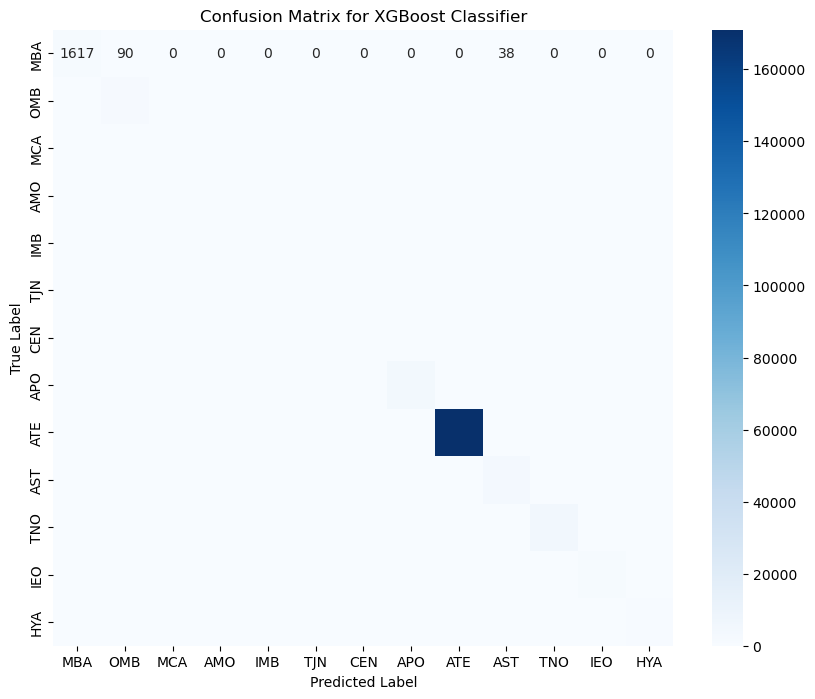

In [45]:
# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test_encoded, predictions_xgb)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='g', cmap='Blues', cbar=True,
            xticklabels=astro_ds['class'].unique().tolist(),
            yticklabels=astro_ds['class'].unique().tolist())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for XGBoost Classifier')
plt.show()

# Neural Network using pytorch

In [46]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset

In [47]:
# Data preprocessing
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

# Convert arrays to tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.LongTensor(y_train_encoded)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.LongTensor(y_test_encoded)

# Load data into DataLoader
train_data = TensorDataset(X_train_tensor, y_train_tensor)
test_data = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

In [48]:
# Define the neural network architecture
class RobustNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(RobustNN, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.bn1 = nn.BatchNorm1d(hidden_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        self.layer2 = nn.Linear(hidden_size, hidden_size // 2)
        self.bn2 = nn.BatchNorm1d(hidden_size // 2)
        self.layer3 = nn.Linear(hidden_size // 2, num_classes)
    
    def forward(self, x):
        x = self.layer1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.layer2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.layer3(x)
        return x

In [49]:
# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize the model, loss criterion, and optimizer
model = RobustNN(input_size=X_train.shape[1], hidden_size=100, num_classes=13).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [50]:
from tqdm import tqdm
# Initialize metrics storage
train_losses = []
valid_losses = []
valid_accuracy = []
# Train the model
start_time = time.time()
# Training loop
num_epochs=5
for epoch in tqdm(range(num_epochs)):
    model.train()
    train_loss = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * inputs.size(0)
    
    # Record average training loss
    train_loss = train_loss / len(train_loader.dataset)
    train_losses.append(train_loss)

    # Validation phase
    model.eval()
    valid_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            valid_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
    
    # Record average validation loss and accuracy
    valid_loss = valid_loss / len(test_loader.dataset)
    valid_losses.append(valid_loss)
    accuracy = correct / total
    valid_accuracy.append(accuracy)

end_time = time.time()

# Time taken
time_taken_nn = end_time - start_time
print(f"Time taken for training: {time_taken_nn:.2f} seconds")

100%|██████████| 5/5 [02:55<00:00, 35.12s/it]

Time taken for training: 175.59 seconds


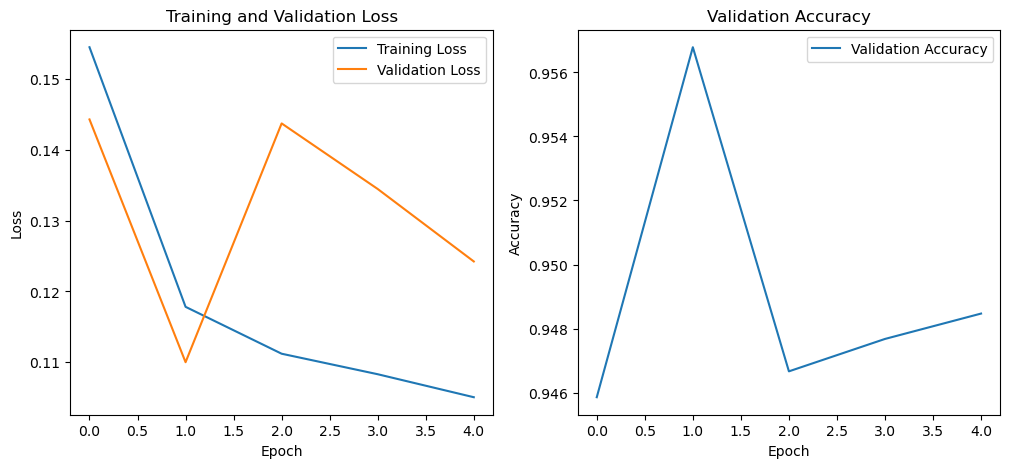

In [51]:
# Plotting
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(valid_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(valid_accuracy, label='Validation Accuracy')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [52]:
# Evaluate the model
model.eval()
predictions = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        predictions.extend(predicted.cpu().numpy())

In [53]:
# Calculate metrics
accuracy_nn = accuracy_score(y_test_encoded, predictions)
print("Accuracy on Test Set by Neural Network: ", accuracy_nn)
print("Neural Network Classification Report:\n", classification_report(y_test_encoded, predictions, zero_division=0))

Accuracy on Test Set by Neural Network:  0.9484676977647949
Neural Network Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.66      0.52      1745
           1       0.76      0.41      0.53      2540
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00       333
           4       0.10      0.70      0.18       108
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         4
           7       0.89      0.99      0.94      4035
           8       0.97      1.00      0.98    171100
           9       0.75      0.49      0.59      3795
          10       0.96      0.19      0.32      5731
          11       0.99      0.99      0.99      1619
          12       0.93      0.04      0.08       684

    accuracy                           0.95    191705
   macro avg       0.52      0.42      0.39    191705
weighted avg       0.95      0.95  

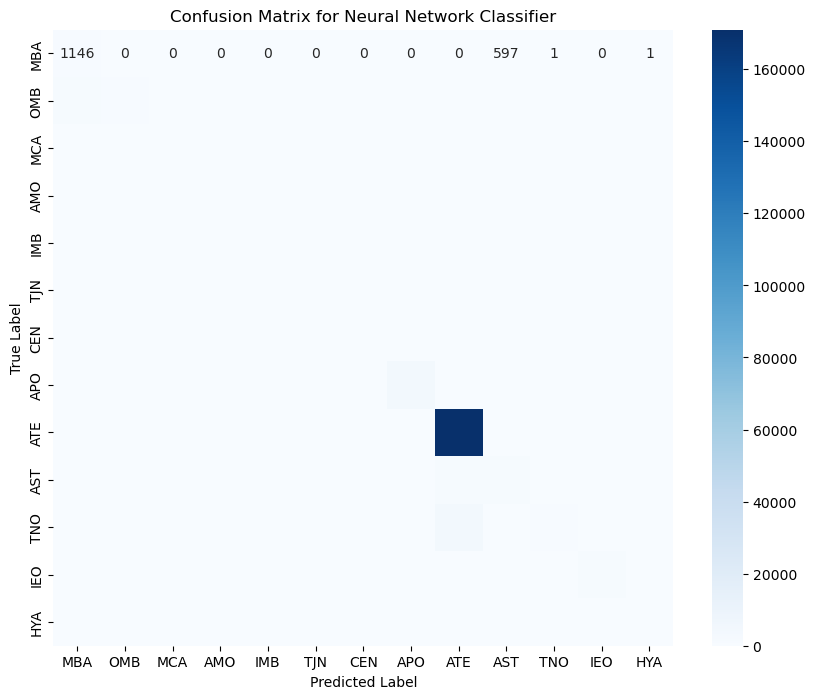

In [54]:
# Confusion Matrix
conf_matrix_nn = confusion_matrix(y_test_encoded, predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_nn, annot=True, fmt='g', cmap='Blues', cbar=True,
            xticklabels=astro_ds['class'].unique().tolist(),
            yticklabels=astro_ds['class'].unique().tolist())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Neural Network Classifier')
plt.show()